# Section 1: 
# Preprocessing Data, Generating Labels and saving them to our system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from glob import glob

import librosa
import librosa.display 

We define a few helper functions to calculate the mel spectrogram and save them onto our device. The values of mels, hoplength and sample rate were decided after experimenting with the data and finding which one was most suitable so store faster but with decent resolution. The final array created is a grayscale image which we with to input into our CNN.

In [2]:
def compute_logmel_spectrogram(y, sr, n_mels=64, hop_length=125):
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length)
    logmel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return logmel_spectrogram

def create_spectrogram(audio_file, array_file): # these are the exact file names of the wav file and the file name we want to save the image as
    
    y, sr = librosa.load(audio_file, sr = 12000)
    log_melspec = compute_logmel_spectrogram(y, sr)
    arr = np.expand_dims(log_melspec, axis=2) # to get it fit for our CNN, where we have a single channel here.
    np.save(array_file, arr)

def create_np_from_wavs(input_path, output_path, mic_string): # these are the directories where the files are stored and where we wanna store
    if (not os.path.exists(output_path)):
        os.makedirs(output_path)
    # the above code is for making a directory where we wanna store if it already hasnt been made
    dir = os.listdir(input_path) # list of all the audio files. Could have also used glob library

    for file in dir:
        input_file = os.path.join(input_path, file) # complete file path with .wav
        output_file = os.path.join(output_path, file.replace('.wav', f'{mic_string}.npy')) # complete file path with .png and our required mic.
        create_spectrogram(input_file, output_file)

In [ ]:
# test data
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_A/A/test/mic1', 
                        output_path = 'MelSpectrogram/test/A/mic1', 
                        mic_string = '_mic1')
# test data for Amic2
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_A/A/test/mic2', 
                        output_path = 'MelSpectrogram/test/A/mic2', 
                        mic_string = '_mic2')

# test data for Bmic1, Bmic2
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_B/B/test/mic1', 
                        output_path = 'MelSpectrogram/test/B/mic1', 
                        mic_string = '_mic1')
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_B/B/test/mic2', 
                        output_path = 'MelSpectrogram/test/B/mic2', 
                        mic_string = '_mic2')

# test for C
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_C/C/test/mic1', 
                        output_path = 'MelSpectrogram/test/C/mic1', 
                        mic_string = '_mic1')
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_C/C/test/mic2', 
                        output_path = 'MelSpectrogram/test/C/mic2', 
                        mic_string = '_mic2')

In [ ]:
#train data for A
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_A/A/train/mic1', 
                        output_path = 'MelSpectrogram/train/A/mic1', 
                        mic_string = '_mic1')

create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_A/A/train/mic2', 
                        output_path = 'MelSpectrogram/train/A/mic2', 
                        mic_string = '_mic2')

# train data for b
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_B/B/train/mic1', 
                        output_path = 'MelSpectrogram/train/B/mic1', 
                        mic_string = '_mic1')
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_B/B/train/mic2', 
                        output_path = 'MelSpectrogram/train/B/mic2', 
                        mic_string = '_mic2')

# train data for c
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_C/C/train/mic1', 
                        output_path = 'MelSpectrogram/train/C/mic1', 
                        mic_string = '_mic1')
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_C/C/train/mic2', 
                        output_path = 'MelSpectrogram/train/C/mic2', 
                        mic_string = '_mic2')

In [ ]:
# validation for a
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_A/A/valid/mic1', 
                        output_path = 'MelSpectrogram/valid/A/mic1', 
                        mic_string = '_mic1')
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_A/A/valid/mic2', 
                        output_path = 'MelSpectrogram/valid/A/mic2', 
                        mic_string = '_mic2')

# validation for b
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_B/B/valid/mic1', 
                        output_path = 'MelSpectrogram/valid/B/mic1', 
                        mic_string = '_mic1')
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_B/B/valid/mic2', 
                        output_path = 'MelSpectrogram/valid/B/mic2', 
                        mic_string = '_mic2')

# validation for c
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_C/C/valid/mic1', 
                        output_path = 'MelSpectrogram/valid/C/mic1', 
                        mic_string = '_mic1')
create_np_from_wavs(input_path = 'sound-based-drone-fault-classification-using-multi/Dataset/Dataset/drone_C/C/valid/mic2', 
                        output_path = 'MelSpectrogram/valid/C/mic2', 
                        mic_string = '_mic2')

Should we proceed with making our labels? It only makes sense! 
Here we have all out data stratified, so our next goal while loading in the data will be to combine all this and also use our data loader to create suitable batch sizes

(64, 49, 1)


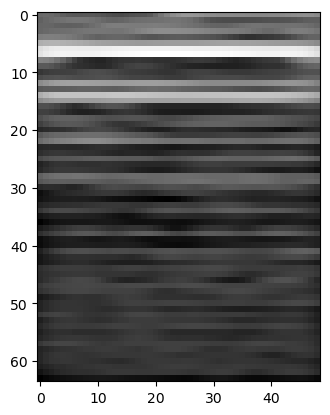

In [4]:
# lets see the shape of our image:
example = np.load('MelSpectrogram/test/A/mic1/A_B_MF1_0_ConstructionSite_6_snr=10.926310539796413_mic1.npy')
example2 = np.load('MelSpectrogram/test/A/mic2/A_B_MF1_0_ConstructionSite_6_snr=10.926310539796413_mic2.npy')
print(example.shape)
plt.imshow(example, cmap = 'gray')

Let us append the labels and the actual data in a together in a loop iteration.  
This will help us move closer to generating the final X_train and Y_train.

In [6]:
# define function that will return a single np image array(64,49,1) and a single label. We will define 2 empty lists before hand 

In [7]:
# we have basic file name
# if the file name has '_mic1.npy' in it, we replace it with .npy only and then later add '_mic1' to it. Likewise with mic2
#-------------------------------
def split_labels(path):
    file_name = os.path.basename(path)

    if '_mic1' in file_name:
        file_name = file_name.replace('_mic1.npy', '.npy_mic1') # this is only for generating our ID
    elif '_mic2' in file_name:
        file_name = file_name.replace('_mic2.npy', '.npy_mic2')

    parts = file_name.split('_')
    parts.insert(0, file_name) # 0th position of list has the 'ID' of our data
    # we need only the first 4 entried of the list: ID, Dronetype, direction, fault
    parts = parts[0:4]

    return parts # returns a list

#--------------------------------

def load_imgLabel_from_path(directory):
    imgArr = []
    labelArr = []

    dir = os.listdir(directory)
    for i in range(len(dir)):
        data = np.load(directory + '/' + dir[i])
        imgArr.append(data)
        
        #---------
        labelArr.append( split_labels(dir[i]) )

    return imgArr, labelArr

x_train = []
y_train = []
x_test = []
y_test = []
x_valid = []
y_valid = []

#### Preparing X_train and Y_train

In [ ]:
directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/train/A/mic1'
img, labels = load_imgLabel_from_path(directory)
x_train += img
y_train += labels

directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/train/A/mic2'
img, labels = load_imgLabel_from_path(directory)
x_train += img
y_train += labels

directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/train/B/mic1'
img, labels = load_imgLabel_from_path(directory)
x_train += img
y_train += labels

directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/train/B/mic2'
img, labels = load_imgLabel_from_path(directory)
x_train += img
y_train += labels

directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/train/C/mic1'
img, labels = load_imgLabel_from_path(directory)
x_train += img
y_train += labels

directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/train/C/mic2'
img, labels = load_imgLabel_from_path(directory)
x_train += img
y_train += labels

In [12]:
X_train_data = np.array(x_train)
Y_train_data = np.array(y_train)
print(X_train_data.shape)
print(Y_train_data.shape)

(194400, 64, 49, 1)
(194400, 4)


['A_B_MF1_mic1_100_EoeunHill_279_snr=11.12957698093741.npy_mic1' 'A' 'B'
 'MF1']


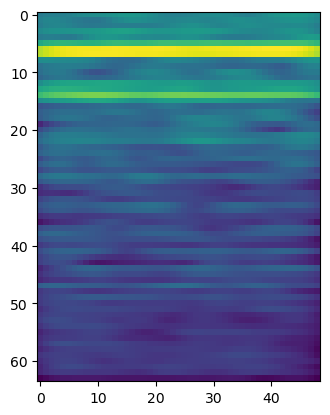

In [13]:
print(Y_train_data[1])
plt.imshow(X_train_data[1])

In [ ]:
# need ot save this array before anything else happens! XD
np.save('X_train_data_melspec.npy', X_train_data)

np.save('Y_train_data_melspec.npy', Y_train_data)

##### Preparing Test data

In [16]:
directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/test/A/mic1'
img2, labels2 = load_imgLabel_from_path(directory)
x_test += img2
y_test += labels2

directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/test/A/mic2'
img2, labels2 = load_imgLabel_from_path(directory)
x_test += img2
y_test += labels2

#------------------------
directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/test/B/mic1'
img2, labels2 = load_imgLabel_from_path(directory)
x_test += img2
y_test += labels2

directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/test/B/mic2'
img2, labels2 = load_imgLabel_from_path(directory)
x_test += img2
y_test += labels2

#-------------------------
directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/test/C/mic1'
img2, labels2 = load_imgLabel_from_path(directory)
x_test += img2
y_test += labels2

directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/test/C/mic2'
img2, labels2 = load_imgLabel_from_path(directory)
x_test += img2
y_test += labels2

In [17]:
# saving the data:
X_test_data = np.array(x_test)
Y_test_data = np.array(y_test)
np.save('X_test_data_melspec.npy', X_test_data)
np.save('Y_test_data_melspec.npy', Y_test_data)

In [18]:
print(X_test_data.shape)
print(Y_test_data.shape)

(64774, 64, 49, 1)
(64774, 4)


##### Preparing Validation Data

In [19]:
directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/valid/A/mic1'
img3, labels3= load_imgLabel_from_path(directory)
x_valid += img3
y_valid += labels3

directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/valid/A/mic2'
img3, labels3= load_imgLabel_from_path(directory)
x_valid += img3
y_valid += labels3

#------------------------
directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/valid/B/mic1'
img3, labels3= load_imgLabel_from_path(directory)
x_valid += img3
y_valid += labels3

directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/valid/B/mic2'
img3, labels3= load_imgLabel_from_path(directory)
x_valid += img3
y_valid += labels3

#-------------------------
directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/valid/C/mic1'
img3, labels3= load_imgLabel_from_path(directory)
x_valid += img3
y_valid += labels3

directory = 'C:/Users/Siddh Singhal/AA_ArIES_Kaggle/MelSpectrogram/valid/C/mic2'
img3, labels3= load_imgLabel_from_path(directory)
x_valid += img3
y_valid += labels3

In [20]:
# saving the data:
X_valid_data = np.array(x_valid)
Y_valid_data = np.array(y_valid)
np.save('X_valid_data_melspec.npy', X_valid_data)
np.save('Y_valid_data_melspec.npy', Y_valid_data)

In [21]:
print(X_valid_data.shape)
print(Y_valid_data.shape)

(64800, 64, 49, 1)
(64800, 4)


##### Making our labels into a dataframe and saving it

In [25]:
column_values = ['ID', 'model_type', 'maneuvering_direction', 'fault'] 
y_train_df = pd.DataFrame(data = Y_train_data,  columns = column_values)
y_test_df = pd.DataFrame(data = Y_test_data, columns = column_values)
y_valid_df = pd.DataFrame(data = Y_valid_data, columns = column_values)

In [26]:
y_valid_df

,ID,model_type,maneuvering_direction,fault
0,A_B_MF1_639_SportsComplex_6_snr=10.77009646408...,A,B,MF1
1,A_B_MF1_640_ConstructionSite_891_snr=14.223962...,A,B,MF1
2,A_B_MF1_641_EoeunHill_744_snr=10.3459389390463...,A,B,MF1
3,A_B_MF1_642_DuckPond_58_snr=12.397906055100504...,A,B,MF1
4,A_B_MF1_643_ConstructionSite_356_snr=14.925637...,A,B,MF1
...,...,...,...,...
64795,C_R_PC4_816_ConstructionSite_843_snr=12.795851...,C,R,PC4
64796,C_R_PC4_817_ConstructionSite_290_snr=10.320124...,C,R,PC4
64797,C_R_PC4_818_SportsComplex_749_snr=11.816728604...,C,R,PC4
64798,C_R_PC4_81_EoeunHill_689_snr=10.75222326066223...,C,R,PC4


In [27]:
y_train_df.to_csv('y_train_mel_df.csv')
y_test_df.to_csv('y_test_mel_df.csv')
y_valid_df.to_csv('y_valid_mel_df.csv')

# ----------------------------------------------

# Section 2:
# Building our Neural Network for Multi-Task Learning

It's time to load our data back in and prepare it for multi-task learning. We will start by importing some packages and handling our training, test and validation data. 

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The data saved is not normalized, and neither is the label categorized for the multiple tasks. Hence we carry out a few steps below.
When we normalize the data, we use the transforms pipeline.

In [2]:
# Helper functions
def reduce_range_to_1(dataset):
    dataset = np.abs(dataset) # because all values in np array were negative or 0
    dataset /= np.max(dataset)
    return dataset

In [3]:
x_train_mel = np.load('X_train_data_melspec.npy')
y_train_mel = (pd.read_csv('y_train_mel_df.csv')).drop(['Unnamed: 0'], axis = 1)
x_train_mel = reduce_range_to_1(x_train_mel)

# x_test_mel = np.load('X_test_data_melspec.npy')
# y_test_mel = pd.read_csv('y_test_mel_df.csv').drop(['Unnamed: 0'], axis = 1)
# x_test_mel = reduce_range_to_1(x_test_mel)

x_valid_mel = np.load('X_valid_data_melspec.npy')
y_valid_mel = pd.read_csv('y_valid_mel_df.csv').drop(['Unnamed: 0'], axis = 1)
x_valid_mel = reduce_range_to_1(x_valid_mel)

In [5]:
label_enc_y_train = y_train_mel
label_enc_y_test = y_test_mel
label_enc_y_valid = y_valid_mel

label_encoder = LabelEncoder()
label_enc_y_train['model_type']= label_encoder.fit_transform(y_train_mel['model_type'])
label_enc_y_train['maneuvering_direction']= label_encoder.fit_transform(y_train_mel['maneuvering_direction'])
label_enc_y_train['fault']= label_encoder.fit_transform(y_train_mel['fault'])

# label_enc_y_test['model_type']= label_encoder.fit_transform(y_test_mel['model_type'])
# label_enc_y_test['maneuvering_direction']= label_encoder.fit_transform(y_test_mel['maneuvering_direction'])
# label_enc_y_test['fault']= label_encoder.fit_transform(y_test_mel['fault'])

label_enc_y_valid['model_type']= label_encoder.fit_transform(y_valid_mel['model_type'])
label_enc_y_valid['maneuvering_direction']= label_encoder.fit_transform(y_valid_mel['maneuvering_direction'])
label_enc_y_valid['fault']= label_encoder.fit_transform(y_valid_mel['fault'])

label_enc_y_valid

,ID,model_type,maneuvering_direction,fault
0,A_B_MF1_0_ConstructionSite_6_snr=10.9263105397...,0,0,0
1,A_B_MF1_100_SportsComplex_497_snr=11.773913984...,0,0,0
2,A_B_MF1_101_SportsComplex_1124_snr=12.55819879...,0,0,0
3,A_B_MF1_102_DuckPond_295_snr=14.95198719869922...,0,0,0
4,A_B_MF1_103_DuckPond_869_snr=11.14729381389035...,0,0,0
...,...,...,...,...
64769,C_R_PC4_977_DuckPond_51_snr=13.385901779609418...,2,5,8
64770,C_R_PC4_97_DuckPond_87_snr=10.6205468195042.np...,2,5,8
64771,C_R_PC4_98_SportsComplex_1018_snr=12.076786226...,2,5,8
64772,C_R_PC4_99_ConstructionSite_843_snr=12.7518851...,2,5,8


In [6]:

y_train_labels = (label_enc_y_train.iloc[:, [0]]).to_numpy()
y_train_drone_arr = ((label_enc_y_train.iloc[:, [1]]).to_numpy()).astype(float)
y_train_dir_arr = ((label_enc_y_train.iloc[:, [2]]).to_numpy()).astype(float)
y_train_fault_arr = ((label_enc_y_train.iloc[:, [3]]).to_numpy()).astype(float)
#-------------

y_test_labels = (label_enc_y_test.iloc[:, [0]]).to_numpy()
y_test_drone_arr = ((label_enc_y_test.iloc[:, [1]]).to_numpy()).astype(float)
y_test_dir_arr = ((label_enc_y_test.iloc[:, [2]]).to_numpy()).astype(float)
y_test_fault_arr = ((label_enc_y_test.iloc[:, [3]]).to_numpy()).astype(float)
#-------------

y_valid_labels = (label_enc_y_valid.iloc[:, [0]]).to_numpy()
y_valid_drone_arr = ((label_enc_y_valid.iloc[:, [1]]).to_numpy()).astype(float)
y_valid_dir_arr = ((label_enc_y_valid.iloc[:, [2]]).to_numpy()).astype(float)
y_valid_fault_arr = ((label_enc_y_valid.iloc[:, [3]]).to_numpy()).astype(float)

y_valid_fault_arr

array([[0.],
       [0.],
       [0.],
       ...,
       [8.],
       [8.],
       [8.]])

The dataloader takes in a dataset that has both the x_labels and the y_labels. So I have to define a custom dataset.

In [7]:
# Inherit from class Dataset of pytorch. It has the len and getitem function
class customDataset(Dataset):
    def __init__(self, x_data, y_labels, drone, direction, fault):
        self.X_data = x_data 
        self.Y_labels = y_labels
        self.drone = drone
        self.direction = direction
        self.fault = fault
        self.transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5)) 
        # the above takes mean and std for every channel. I have chosen 0.5 and 0.5 because it brings the range of dataset to -1 and 1
    ])

    def __len__(self):
        return len(self.X_data)

    def __getitem__(self, i):
        x = self.X_data[i]
        x = self.transform(x)
        file_name = self.Y_labels[i]
        drone = torch.tensor(self.drone[i])
        direc = torch.tensor(self.direction[i])
        fault = torch.tensor(self.fault[i])
        labels = (drone, direc, fault)
        # converitng my y_labels to tensor from numpy
        
        return x, labels#, file_name

In [8]:
train_dataset_mel = customDataset(x_train_mel, y_train_labels, y_train_drone_arr, y_train_dir_arr, y_train_fault_arr)
test_dataset_mel = customDataset(x_test_mel, y_test_labels, y_test_drone_arr, y_test_dir_arr, y_test_fault_arr)
valid_dataset_mel = customDataset(x_valid_mel, y_valid_labels, y_valid_drone_arr, y_valid_dir_arr, y_valid_fault_arr)
# transform composition from above

Thought: Use of dropout and learning rate decay while training

In [9]:
batch_size = 64
n_epochs = 5
learning_rate_initial = 0.001 # my plan is to use a learning rate decay to prevent overshooting as i approach the end.

In [10]:
train_loader = torch.utils.data.DataLoader(train_dataset_mel, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset_mel, batch_size = batch_size, shuffle = False)  # because this is just for evaluation, no need to shuffle
valid_loader = torch.utils.data.DataLoader(valid_dataset_mel , batch_size = batch_size, shuffle = False)

##### We successfully have a prepared dataset and dataloader with our y_data having integer labels for our cross entropy loss!
Let us now get into building our model!

##### Note for cross entropy loss:
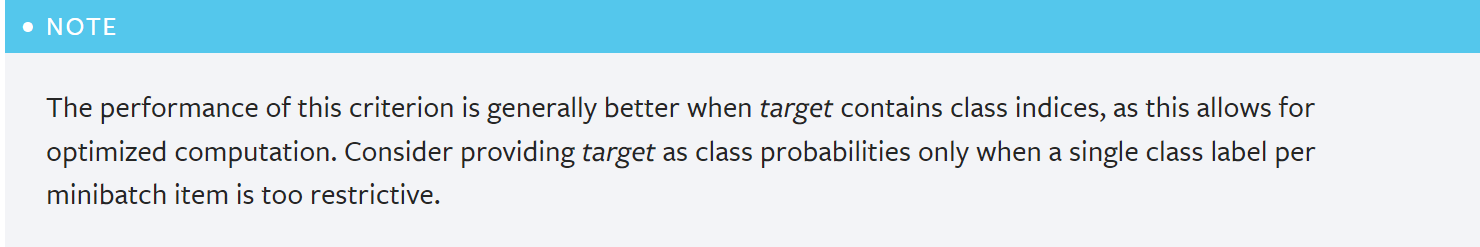

In [11]:
class mtlCNN(nn.Module):
    def __init__(self, in_channels = 1, n_drone_class = 3, n_direction = 6, n_fault = 9, dropout_rate = 0.1):
        super(mtlCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size = 3, stride = 1, padding = 1) # input channels, output channels, padding = same
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # makes the dimensions half. so 32x24
        self.conv2 = nn.Conv2d(6, 16, kernel_size = 5, stride = 1, padding = 2) # dimensions 15x10, padding = same
        self.conv3 = nn.Conv2d(16, 32, 2, 2)
        self.pool2 = nn.MaxPool2d(2,2) # dimensions = 8*6 with 32 filters
        
        # fully connected layer, making 3 heads for our 3 tasks
        
        self.drone_type_fc = nn.Linear(32*8*6, 3)
        self.dir_fc = nn.Linear(32*8*6, 6)
        self.fault_fc = nn.Linear(32*8*6, 9)
        
        self.dropout1 = nn.Dropout(p=dropout_rate)
        self.dropout2 = nn.Dropout(p=dropout_rate)
        # using dropout as a method for regularization, so it doesnt overfit to the training set

    def forward(self, x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.dropout1(out)
        out = F.relu(self.conv2(out))
        out = self.pool2(F.relu(self.conv3(out)))
        out = self.dropout2(out)
        out = out.view(out.size(0), -1) # preserves the number of samples of images, and flattens the image into dense format
        pred_drone = self.drone_type_fc(out)
        pred_direction = self.dir_fc(out)
        pred_fault = self.fault_fc(out)

        return pred_drone, pred_direction, pred_fault

In [41]:
# testing cell, application later:
# for batch_id, (inputs, labels) in enumerate(test_loader):
#     (lbl_drone, lbl_direction, lbl_fault) = labels
#     if True:
#         print(lbl_drone.view(-1))
#         break

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float64)


In [20]:
def train_val_Compute(model, dataloader, optimizer, criterion, is_training, device, epoch, num_epochs):

    total_examples = 0
    correct_preds = torch.zeros((3,1), dtype=torch.float32, device=device)
    losses = [] # total losses stored
    
    with torch.set_grad_enabled(is_training): # a single function for both train and validation

        if is_training: 
            model.train()
        else: 
            model.eval()

        
        for batch_id, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            # Error: "nll_loss_forward_reduce_cuda_kernel_2d_index" not implemented for 'Float'
            # to avoid this, cast to long Tensor
            labels = [lbl.type(torch.LongTensor) for lbl in labels]
            labels = [lbl.to(device) for lbl in labels]
            (lbl_drone, lbl_direction, lbl_fault) = labels

            # converting the labels to one dimension, as required by the loss funciton
            lbl_drone = lbl_drone.view(-1)
            lbl_direction = lbl_direction.view(-1)
            lbl_fault = lbl_fault.view(-1)
            
            preds = model(inputs)
            (pred_drone, pred_direction, pred_fault) = preds

            loss_drone = criterion(pred_drone, lbl_drone)
            loss_direction = criterion(pred_direction, lbl_direction)
            loss_fault = criterion(pred_fault, lbl_fault)

            loss_final = loss_drone + loss_direction + loss_fault
            losses.append(loss_final.item())

            # finding accuracy:
            # to be noted: the predictions come as probabilities for every class. So we need to round them
            correct_preds[0] +=  torch.mean((torch.argmax(pred_drone) == lbl_drone).float()) # mean over number of examples in a single batch
            # converts boolean to float value, then finds mean value over a single batch
            correct_preds[1] +=  torch.mean((torch.argmax(pred_direction) == lbl_direction).float())
            correct_preds[2] +=  torch.mean((torch.argmax(pred_fault) == lbl_fault).float())
            total_examples += inputs.size(0)

            if is_training:
                optimizer.zero_grad() 
                # needed so that grad is emptied every iteration
                loss_final.backward()
                optimizer.step()

        task_accuracies = torch.zeros((3,1), dtype = torch.float32)
        task_accuracies[0] = correct_preds[0]/total_examples
        task_accuracies[1] = correct_preds[1]/total_examples
        task_accuracies[2] = correct_preds[2]/total_examples

        avg_loss_epoch = sum(losses)/ len(losses)

        # Printing the accuracies:
        # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss_epoch: 0.4f}')
        # print('Drone Acc: ', 100*task_accuracies[0], '% Direction Acc: ', 100*task_accuracies[1], '% Fault Acc: ', 100*task_accuracies[2], '%')

In [21]:
# train loop

def train_loop(model, num_epochs, dataloader_train, dataloader_val, 
               lr_scheduler, criterion, optimizer): 
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    for epoch in range(num_epochs):
        # we have to get the lr from the scheduler... so we do this: .get_last_lr
        lr_new = lr_scheduler.get_last_lr()
        # print("lr = ", lr_new)
         
        print(f'Epoch {epoch}: \nTRAINING')
        train_val_Compute(model, dataloader_train, optimizer, criterion, True, device, epoch, num_epochs)
        lr_scheduler.step()
        print("VALIDATION")
        train_val_Compute(model, dataloader_val, optimizer, criterion, False, device, epoch, num_epochs)

Setting up our hyperparameters

In [22]:
lr_initial = 0.001
epochs = 15

model = mtlCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate_initial)
lr_sched = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma=0.9) #changes every 5 epochs

#### Training our model

In [ ]:
train_loop(model, epochs, train_loader, valid_loader, lr_sched, criterion, optimizer)

In [24]:
# SAVE THE MODEL
torch.save(model, 'mtlDronev3')

# '''model = torch.load(PATH)
# model.eval()'''

# ----------------------------------------------

# Section 3:
# Running our model on test data

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
class mtlCNN(nn.Module):
    def __init__(self, in_channels = 1, n_drone_class = 3, n_direction = 6, n_fault = 9, dropout_rate = 0.1):
        super(mtlCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size = 3, stride = 1, padding = 1) # input channels, output channels, padding = same
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # makes the dimensions half. so 32x24
        self.conv2 = nn.Conv2d(6, 16, kernel_size = 5, stride = 1, padding = 2) # dimensions 15x10, padding = same
        self.conv3 = nn.Conv2d(16, 32, 2, 2)
        self.pool2 = nn.MaxPool2d(2,2) # dimensions = 8*6 with 32 filters
        # fully connected layer, making 3 heads for our 3 tasks
        self.drone_type_fc = nn.Linear(32*8*6, 3)
        self.dir_fc = nn.Linear(32*8*6, 6)
        self.fault_fc = nn.Linear(32*8*6, 9)
        
        self.dropout1 = nn.Dropout(p=dropout_rate)
        self.dropout2 = nn.Dropout(p=dropout_rate)
        # using droput as a method for regularization, so it doesnt overfit to the training set

    def forward(self, x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.dropout1(out)
        out = F.relu(self.conv2(out))
        out = self.pool2(F.relu(self.conv3(out)))
        out = self.dropout2(out)
        out = out.view(out.size(0), -1) # preserves the number of samples of images, and flattens the image into dense
        pred_drone = self.drone_type_fc(out)
        pred_direction = self.dir_fc(out)
        pred_fault = self.fault_fc(out)

        return pred_drone, pred_direction, pred_fault
    
model = torch.load("/kaggle/input/test-dataset/mtlDronev3")
model.to(device)

mtlCNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(16, 32, kernel_size=(2, 2), stride=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drone_type_fc): Linear(in_features=1536, out_features=3, bias=True)
  (dir_fc): Linear(in_features=1536, out_features=6, bias=True)
  (fault_fc): Linear(in_features=1536, out_features=9, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

#### Idea: Make 3 separate label encoder so that it will be useful for inverse transformation to true labels.

In [16]:
def reduce_range_to_1(dataset):
    dataset = np.abs(dataset) # works because all values in np array were negative or 0
    dataset /= np.max(dataset)
    return dataset

x_test_mel = np.load('/kaggle/input/test-dataset/X_test_data_melspec.npy')
y_test_mel = pd.read_csv('/kaggle/input/test-dataset/y_test_mel_df.csv').drop(['Unnamed: 0'], axis = 1)
x_test_mel = reduce_range_to_1(x_test_mel)

label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
# making separate because useful for inverse label encoding in submission csv

label_enc_y_test = y_test_mel
label_enc_y_test['model_type']= label_encoder1.fit_transform(y_test_mel['model_type'])
label_enc_y_test['maneuvering_direction']= label_encoder2.fit_transform(y_test_mel['maneuvering_direction'])
label_enc_y_test['fault']= label_encoder3.fit_transform(y_test_mel['fault'])

y_test_labels = (label_enc_y_test.iloc[:, [0]]).to_numpy()
y_test_drone_arr = ((label_enc_y_test.iloc[:, [1]]).to_numpy()).astype(float)
y_test_dir_arr = ((label_enc_y_test.iloc[:, [2]]).to_numpy()).astype(float)
y_test_fault_arr = ((label_enc_y_test.iloc[:, [3]]).to_numpy()).astype(float)

In [4]:
class customDataset(Dataset):
    def __init__(self, x_data, y_labels, drone, direction, fault):
        self.X_data = x_data 
        self.Y_labels = y_labels
        self.drone = drone
        self.direction = direction
        self.fault = fault
        self.transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5)) 
        # the above takes mean and std for every channel. I have chosen 0.5 and 0.5 because it brings the range of dataset to -1 and 1
    ])

    def __len__(self):
        return len(self.X_data)

    def __getitem__(self, i):
        x = self.X_data[i]
        x = self.transform(x)
        file_name = self.Y_labels[i]
        drone = torch.tensor(self.drone[i])
        direc = torch.tensor(self.direction[i])
        fault = torch.tensor(self.fault[i])
        labels = (drone, direc, fault)
        # converitng my y_labels to tensor from numpy
        
        return x, labels


test_dataset_mel = customDataset(x_test_mel, y_test_labels, y_test_drone_arr, y_test_dir_arr, y_test_fault_arr)
batch_size = 64
test_loader = torch.utils.data.DataLoader(test_dataset_mel, batch_size = batch_size, shuffle = False) 

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
drone_preds = torch.tensor([], device = device)
direction_preds = torch.tensor([], device = device)
fault_preds = torch.tensor([], device = device)
model.eval()
for imgs, labels in test_loader:
    # Your training code here
    imgs = imgs.to(device)

    preds = model(imgs)
    preds = [prd.to(device) for prd in preds]
    (pred_drone, pred_direction, pred_fault) = preds
    
    
    drone_preds = torch.cat((drone_preds, pred_drone), 0)
    direction_preds = torch.cat((direction_preds, pred_direction), 0)
    fault_preds = torch.cat((fault_preds, pred_fault), 0)
    
print(drone_preds.shape)
print(direction_preds.shape)
print(fault_preds.shape)

torch.Size([64774, 3])
torch.Size([64774, 6])
torch.Size([64774, 9])


### Generating our final labels for predictions

In [6]:
# storing these arg max values in an arrays to generate a proper output with the labels we have
length = len(drone_preds)
drone_preds_arr = torch.zeros((length,1), dtype= torch.float32, device = 'cpu')
direction_preds_arr = torch.zeros((length,1), dtype= torch.float32,  device = 'cpu')
fault_preds_arr = torch.zeros((length,1), dtype= torch.float32,  device = 'cpu')

for i in range(length):
    drone_preds_arr[i] = torch.argmax(drone_preds[i])
    direction_preds_arr[i] = torch.argmax(direction_preds[i])
    fault_preds_arr[i] = torch.argmax(fault_preds[i])

#### Calculating accuracies for all the 3 tasks

In [ ]:
# drone_acc = 100*((drone_preds_arr.numpy() == y_test_drone_arr).sum().item())/length
# direction_acc = 100*((direction_preds_arr.numpy() == y_test_dir_arr).sum().item())/length
# fault_acc = 100*((fault_preds_arr.numpy() == y_test_fault_arr).sum().item())/length
# print('Drone Classification accuracy: ', drone_acc, '%')
# print('Direction Classification accuracy: ', direction_acc, '%')
# print('Fault Classification accuracy: ', fault_acc, '%')

# expected_score = (drone_acc + 2*direction_acc + 1.5*fault_acc)/(1 + 2 + 1.5)
# print('Expected Score: ', expected_score)

##### Now we export our labels to their respective class names and then make a final CSV file to be submitted

In [28]:
submission_csv = pd.DataFrame(label_enc_y_test['ID'].str.replace('.npy', '.wav'))
submission_csv['model_type'] = drone_preds_arr.int()
submission_csv['maneuvering_direction'] = direction_preds_arr.int()
submission_csv['fault'] = fault_preds_arr.int()
submission_csv

,ID,model_type,maneuvering_direction,fault
0,A_B_MF1_0_ConstructionSite_6_snr=10.9263105397...,0,3,4
1,A_B_MF1_100_SportsComplex_497_snr=11.773913984...,0,1,4
2,A_B_MF1_101_SportsComplex_1124_snr=12.55819879...,0,4,4
3,A_B_MF1_102_DuckPond_295_snr=14.95198719869922...,0,0,1
4,A_B_MF1_103_DuckPond_869_snr=11.14729381389035...,0,2,0
...,...,...,...,...
64769,C_R_PC4_977_DuckPond_51_snr=13.385901779609418...,2,5,8
64770,C_R_PC4_97_DuckPond_87_snr=10.6205468195042.wa...,2,5,8
64771,C_R_PC4_98_SportsComplex_1018_snr=12.076786226...,2,5,8
64772,C_R_PC4_99_ConstructionSite_843_snr=12.7518851...,2,5,4


In [29]:
submission_csv['model_type'] = label_encoder1.inverse_transform(submission_csv['model_type'])
submission_csv['maneuvering_direction'] = label_encoder2.inverse_transform(submission_csv['maneuvering_direction'])
submission_csv['fault'] = label_encoder3.inverse_transform(submission_csv['fault'])
submission_csv

,ID,model_type,maneuvering_direction,fault
0,A_B_MF1_0_ConstructionSite_6_snr=10.9263105397...,A,F,N
1,A_B_MF1_100_SportsComplex_497_snr=11.773913984...,A,C,N
2,A_B_MF1_101_SportsComplex_1124_snr=12.55819879...,A,L,N
3,A_B_MF1_102_DuckPond_295_snr=14.95198719869922...,A,B,MF2
4,A_B_MF1_103_DuckPond_869_snr=11.14729381389035...,A,CC,MF1
...,...,...,...,...
64769,C_R_PC4_977_DuckPond_51_snr=13.385901779609418...,C,R,PC4
64770,C_R_PC4_97_DuckPond_87_snr=10.6205468195042.wa...,C,R,PC4
64771,C_R_PC4_98_SportsComplex_1018_snr=12.076786226...,C,R,PC4
64772,C_R_PC4_99_ConstructionSite_843_snr=12.7518851...,C,R,N


In [ ]:
submission_csv.to_csv('/kaggle/working/submissionv3.csv', index = False)